# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 9</span>


### The Traveling Salesman Problem

The traveling salesman problem (TSP) consists of a salesman and a set of $N$ cities with positions $\vec{c}_i$. The salesman **has to visit each one of the cities starting from a certain one (e.g. the hometown) and returning to the same city**. The challenge of the problem is that the traveling salesman wants to **minimize the total length of the trip**.

Consider now the ordered sequence of cities, $\vec{c}_1, \vec{c}_2, \dots, \vec{c}_N$, which goes from city 1 to the n$^{th}$ city. The path that minimizes the following loss/cost function:

$$
L^{(2)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N) = \sum_{i=1}^{N} |\vec{x}_i-\vec{x}_{i+1}|^2
$$

or 
$$
L^{(1)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N) = \sum_{i=1}^{N} |\vec{x}_i-\vec{x}_{i+1}|
$$


(with $\vec{x}_{N+1}=\vec{x}_1$) is one particular permutation, P, of the ordered sequence of cities $\vec{c}_1, \vec{c}_2, \dots, \vec{c}_N$, i.e. 

$$
\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N = \vec{c}_{P1}, \vec{c}_{P2}, \dots, \vec{c}_{PN}
$$

Note also that any particular permutation of the ordered sequence of cities can be obtained from the combination of many simple permutations among pairs of cities.

We can express a possible path via a 1D vector whose elements, from the first to the last, are integers that represents the cities in the order in which the salesman would visit them; for example for $N=5$ cities one possible path is represented by the vector:

$$
\left[ 1, 3, 5, 4, 2 \right]
$$

**Alteratively**, we can express a possible path also via a configuration of a $N\times N$ 2D *Ising-like* model with the following bonds:
1. any row must have one and at most one up spin
2. any column must have one and at most one up spin,

all the other spins are down.

We can represent such a configuration with a $N\times N$ matrix whose elements are 1 (spin up) or 0 (spin down); for example, in the case of a TSP with 5 cities:
$$
\begin{bmatrix}
1 & 0 & 0 & 0 & 0\\
0 & 0 & 0 & 0 & 1\\
0 & 1 & 0 & 0 & 0\\
0 & 0 & 0 & 1 & 0\\
0 & 0 & 1 & 0 & 0\\
\end{bmatrix}
$$

You can interpret this matrix in the following way:
- column index represents time of visit: first colum = first visit, etc.
- row index represents the ordered sequence of cities: first row = first city, etc.

the previous matrix thus refers to the following sequence:

$$
\vec{x}_1, \vec{x}_2, \vec{x}_3, \vec{x}_4, \vec{x}_5 = 
\vec{c}_{1}, \vec{c}_{3}, \vec{c}_{5}, \vec{c}_{4}, \vec{c}_{2}
$$

and thus to the following *cost* of the path:

$$
L^{(2)}(\vec{x}_1, \dots, \vec{x}_5) = 
|\vec{c}_1-\vec{c}_3|^2 + |\vec{c}_3-\vec{c}_5|^2 + |\vec{c}_5-\vec{c}_4|^2 +
|\vec{c}_4-\vec{c}_2|^2 + |\vec{c}_2-\vec{c}_1|^2
$$

or
$$
L^{(1)}(\vec{x}_1, \dots, \vec{x}_5) = 
|\vec{c}_1-\vec{c}_3| + |\vec{c}_3-\vec{c}_5| + |\vec{c}_5-\vec{c}_4| +
|\vec{c}_4-\vec{c}_2| + |\vec{c}_2-\vec{c}_1|
$$


Note that, for this *ising-like* representation any particular permutation of the ordered sequence of cities can be obtained by a sequence of multiple pair permutations among rows and/or among columns.

**<span style="color:red">Warm suggestion: by using the 1D representation</span>** (but you can work with the representation you prefer or the one you are able to invent) ...

### Exercise 09.1

Write a code to solve the TSP with a **Genetic** algorithm (GA). Note that you should invent **some** *genetic-mutation* operators and a *genetic-crossover* operator which should preserve the bonds of the problem: the salesman must visit one and only one time every city and must be back to the first city in the end of the path.

Once the data structure of your code is ready, before you start coding your genetic operators, I warmly suggest you to code the creation of the starting population and to code a **check function** that verifies if every *individual* fulfils the bonds. Then check your starting population ... and use your check function every time you create a new individual.

You have to invent also a **selection** operator. 
The fitness and thus the order of the population should be obtained from $L^{(2)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N)$ or $L^{(1)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N)$. Once your starting population has been ordered on a fitness basis,
you have 2 possibilities:
1. write a selection operator which obtain the probability to select an individual from $L^{(2)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N)$ or $L^{(1)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N)$
2. write a selection operator which simply uses the order in the orderd population with $M$ individuals, e.g. select the individual $j$ with the algorithm: $j= int(M \times r^p)+1$ where $r$ is a uniform random number $r\in[0,1)$ and $p$ a convenient exponent. 

<span style="color:red">Set the first city to always appear at position 1, so as to reduce the degeneration of the shortest route to be 2, which corresponds to walking the shortest route in clockwise and anti-clockwise directions.</span>

Then you can start introducing some *genetic-mutation* operators, for example:
1. pair permutation of cities (except for the first city), e.g. $\left[ 1, 2, 3, 4, 5 \right] \to \left[ 1, 2, 4, 3, 5 \right]$ (At this point you should already have such operator ... how have you generated the starting population?).
2. shift of $+n$ positions for $m$ contiguous cities (except for the first city and $m \lt N-1$), e.g. $\left[ 1, 2, 3, 4, 5 \right] \to \left[ 1, 4, 5, 2, 3 \right] $ for a $+2$ shift of the second and third cities.
3. permutation among $m$ contiguous cities (except for the first city) with other (different!) $m$ contiguous cities ($m<N/2$), e.g. $\left[ 1, 2, 3, 4, 5 \right] \to \left[ 1, 4, 5, 2, 3 \right] $ for a permutation of the second and third cities with the last 2.
4. inversion of the order in which they appear in the path of $m$ cities (except for the first city and $m \le N$), e.g. $\left[ 1, 2, 3, 4, 5 \right] \to \left[ 1, 4, 3, 2, 5 \right]$ for the inversion of the cities from 2 to 4.

Every mutation will have its probability, $p^{(i)}_m$ to be called and typically $p^{(i)}_m < 10\%$, but before to include crossover you can check if the GA is able to perform a good *random search* using only mutation operators (in this case $p^{(i)}$ could be higher than in the previous suggestion).

At this point you can add a *crossover* operator (that fulfils the bonds and that you will call with probability $p^{(i)}_c > 50\%$):

given a selected mother and father, e.g. 
$$
\left[ 1, 2, 3, 4, 5 \right]\\
\left[ 1, 5, 4, 3, 2 \right] 
$$
1. cut their paths at the same position:
$$
\left[ 1, 2, 3 | 4, 5 \right]\\
\left[ 1, 5, 4 | 3, 2 \right] 
$$
2. conserve the first part of the paths:
$$
\left[ 1, 2, 3 | X, Y \right]\\
\left[ 1, 5, 4 | X, Y \right] 
$$
3. complete the paths with the missing cities adding them in the **order** in which they appear in the consort:
$$
\left[ 1, 2, 3 | 5, 4 \right]\\
\left[ 1, 5, 4 | 2, 3 \right] 
$$

Here you are: you have two sons that you can add to the new generation ... and so on!

Apply your code to the optimization of a path among 

- <span style="color:blue">34 cities randomly placed **on** a circumference</span>
- <span style="color:blue">34 cities randomly placed **inside** a square</span>

Show your results via:

- <span style="color:red">a picture of $L^{(2)}$ (or $L^{(1)}$) of the best path and of $\langle L^{(2)}\rangle$ (or $\langle L^{(1)}\rangle$), averaged on the best half of the population, as a function of the iterations/generations of your algorithm</span>
- <span style="color:red">a picture of the best path in cartesian coordinates</span>

## Introduction to the code

In this notebook, I will introduce the Traveling Salesman Problem (TSP) and the fundamental principles of the genetic algorithm. Below, I explain the structure of my program by commenting on the different sections in `main.cpp`. You can find instructions on how to compile the program in the `Read.me` file located in the `Esercizio_9_1` directory.

### Program Structure

The genetic algorithm implementation involves several key components:

- A `city` class that defines the 2D positions of the 34 cities used in the problem.
- A `tsp.h` class that contains all the methods necessary to execute the genetic algorithm.
- A `random` class responsible for random number generation throughout the algorithm.

Each of these components is essential for ensuring that the genetic algorithm works efficiently and effectively. Below, I will describe the program's structure in more detail, along with commentary on each part of the code of `main.cpp`.


### Initialization of the problem:
The main programm star with the call of two method belonging to `tsp.h` called `initialize()` and `initialize_prop()`:
The first one aim to initialize random class and  read a file with path: `.\INPUT\input.dat` where there are the information to set the problem:

| Parameter       | Value |
|-----------------| ------|
| SHAPE           | 0/1   |
| RADIUS          | 1     |
| N_CITY          | 34    |
| POPULATION      | 100/400|
| ENDINPUT        |       |

Where `SHAPE` defines the geometric figure where the cities are placed: (0 for a circle, 1 for a square); `RADIUS` is the radius of the circle or the half-side length of the square; `N_CITY` is the number of cities; and `POPULATION` is the number of "genes" in the population.
Additionally, an Armadillo field is generated containing all the available cities.

Secondly, in `initialize_prop()`, two matrices are created:

- The first is a matrix of size `(population x N_CITY)`, where all the possible distances between cities are precomputed, so they don't need to be calculated during the algorithm execution.
  
- The second is a matrix of size `(population x N_CITY-1)`, where initial random combinations of cities are stored. The size is `(N_CITY-1)` because the problem requires fixing the first city, so mutations and crossovers are only applied to the other cities.

### Loss Function and Selection Operator:

For the problem setup: the goal is to find the most optimal and shortest path that connects all the cities, passing through each one only once. The loss function $ L(\vec{x}) $ is calculated directly from the distance matrix using `Fitness_f_1()`. But how are   the two genes selected that will be candidates for generating the next population? To solve this, I wrote a code that selects the two genes based on the loss function of each individual, giving preference to those with lower loss values. This part of the algorithm starts with a function in the `tsp` class called `cumulative_fit`, which calculates the following:

$$
F(\vec{x_j}) = \frac{\frac{1}{L(\vec{x_j})^{\alpha}}}{\sum_{i=1}^{NCITY} \frac{1}{L(\vec{x_i})^{\alpha}}}
$$


This results in a number between 0 and 1, which measures the weight of each gene's fitness in relation to the total sum. Two considerations: the fitness is calculated so that higher values correspond to lower loss function values. Additionally, this value is raised to a power $\alpha$ to emphasize the weights of genes with higher fitness values. 

Subsequently, the `cumulative_fit` function creates a vector of the same length as the population size and cumulatively fills it with the fitness values of each gene, following the order of the population matrix. This creates intervals between 0 and 1, where the total sum is 1.

```cpp
double tsp::Fitness_f_1(vec x){
    double Loss = abs(m_dist(0,x[1]));
    for (int i = 0; i < x.size()-1; i++){
        Loss += abs(m_dist(x[i],x[i+1]));
    }
    Loss += m_dist(x[x.size()-1],0);
    return 1./Loss;
};

vec tsp::cumulative_fit(mat popul , double pot) {
    int dim = popul.n_rows; // Population
    vec fit(dim, fill::zeros);

    // Pre-calculation of total fitness
    double sum_fit = 0.;
    for (int i = 0; i < dim; ++i) {
        sum_fit += pow(Fitness_f_1(vec(popul.row(i).t())),pot);
    }
    
    // Calculating normalized cumulative fitness values
    fit[0] = pow(Fitness_f_1(vec(popul.row(0).t())),pot) / sum_fit;
    for (int i = 1; i < dim; ++i) {
        fit[i] = fit[i-1] + pow(Fitness_f_1(vec(popul.row(i).t())),pot) / sum_fit;
    }

    return fit;
}

```

Afterward, the method `select_idx_fit()` selects a random number between 0 and 1, finds the corresponding value within the cumulative array, and returns the index of the gene that corresponds to the fitness interval. This index will be the same as the index of the selected gene from the population, and that gene will be the chosen parent:

```cpp
   
   int tsp:: select_idx_fit(vec cum_fit){
    double x = _rnd.Rannyu(0,1);
     for (int i = 0; i < cum_fit.size(); ++i) {
        if (x < cum_fit[i]) {
          return i;  // give the index of x taken;
         }
      }
    
      return cum_fit.size() - 1;  // nothing is taken (impossible); give last element
    
  };

```
In this way I choose the gene to create the new popolution for algorithm genetic.

For the cities arranged on a circumference, a value of $\alpha = 15.899$ was found, while for the cities arranged in a square, a value of $\alpha = 8.000 $ was found. The power to which the loss is raised likely depends on several factors, which will be discussed later.



### Mutation and Cross-over operators:

Below I show the trasformation request by the exercise: I choose for mutation a probability of `p_m = 4.5%` and for croosover `p_c = 81%`.
```cpp
   void tsp :: crossover (vec& v, vec& w){
      double s = _rnd.Rannyu(0,1);
      if (s < p_c){
        children_generator(v,w);           \\cross over operator.
        cout << "crossover happened"<< endl;
        check_vec(v);
        check_vec(w);
        }
    };
```
where the function `children_generator()` is the cross-operator explained in the exercise test; to decide if applicate the transformation is extracted a number between 0,1 uniformly and understand if is under the threshold imposed.
The same happened for `mutation()`:

```cpp
    void tsp:: mutation (vec& v){
            double x = 0.;
            int counter = 1;
            while (counter < 4){
            x = _rnd.Rannyu();
            if (counter == 1){
            //cout << "sto facendo pair permutation "<< endl;
              if(x < p_m){
                pair_permutation(v);    //pair permutation of 2 element [1,2,3,4,5]->[1,4,3,2,5];
                check_vec(v);           //necessity to check if there are all the city in the vector;
                counter ++;
                cout << "fatto pair permutation "<< endl;
                
              }else{
                //cout << " non fatto pair permutation "<< endl;
               counter++;}
            }
            x = _rnd.Rannyu();
            if (counter == 2){
            //cout << "sto facendo shift n "<< endl;
            if(x < p_m){
                shift_n(v);         //shift +n of m contiguos element [1,2,3,4,5]->[1,4,5,2,3];
                check_vec(v);  
                counter ++;
                cout << "fatto shift n "<< endl;
               }else{
                //cout << " non fatto shift n "<< endl;
                counter++;}
            }
            x = _rnd.Rannyu();
              if (counter == 3){
              //cout << "sto facendo m city "<< endl;
              if(x < p_m){
                swap_m_city(v);    //swap of m contiguos element with other m (different) [1,2,3,4,5,6]->[1,5,6,4,2,3];
                check_vec(v);
                counter ++;
                cout << "fatto m city "<< endl;
             }else{
                //cout << "non fatto m city "<< endl;
                counter++;}
            }
            x = _rnd.Rannyu();
              if (counter == 4){
              //cout << "sto facendo swap back "<< endl;
              if(x < p_m){
                swap_back(v);    //swap back m region  [1,2,3,4,5,6]->[1,5,4,3,2,6];
                check_vec(v);
                counter ++;
                cout << "fatto swap back"<< endl;
               }else{
                //cout << "non fatto swap back"<< endl;
                counter++;}
            }
          }
        };
```
The function `check_vector()` controll if in the vector there are all the cities of the problem.
If the crossover or mutation does not occur, a copy of the vectors is returned.

This process is iterated until a new population is reached, consisting of the same number of genes as the previous one.





### Generation and Population:
This process for the cities arranged on a circumference was repeated for 350 generations with a population of 100 paths, while for the cities placed inside a square, it was repeated for a total of 300 generations with a population of 400 paths. 
These two factors likely have a significant impact on the convergence sought by the problem, and consequently, the value of the weight $\alpha$ found previously depends on them.
From this analysis, and from the graphs in the next section, it is possible to notice how increasing the population allows reaching convergence using fewer generations.





## Results:

I put here the requests of the exercise:

Apply your code to the optimization of a path among 

- <span style="color:blue">34 cities randomly placed **on** a circumference</span>
- <span style="color:blue">34 cities randomly placed **inside** a square</span>

Show your results via:

- <span style="color:red">a picture of $L^{(2)}$ (or $L^{(1)}$) of the best path and of $\langle L^{(2)}\rangle$ (or $\langle L^{(1)}\rangle$), averaged on the best half of the population, as a function of the iterations/generations of your algorithm</span>
- <span style="color:red">a picture of the best path in cartesian coordinates</span>



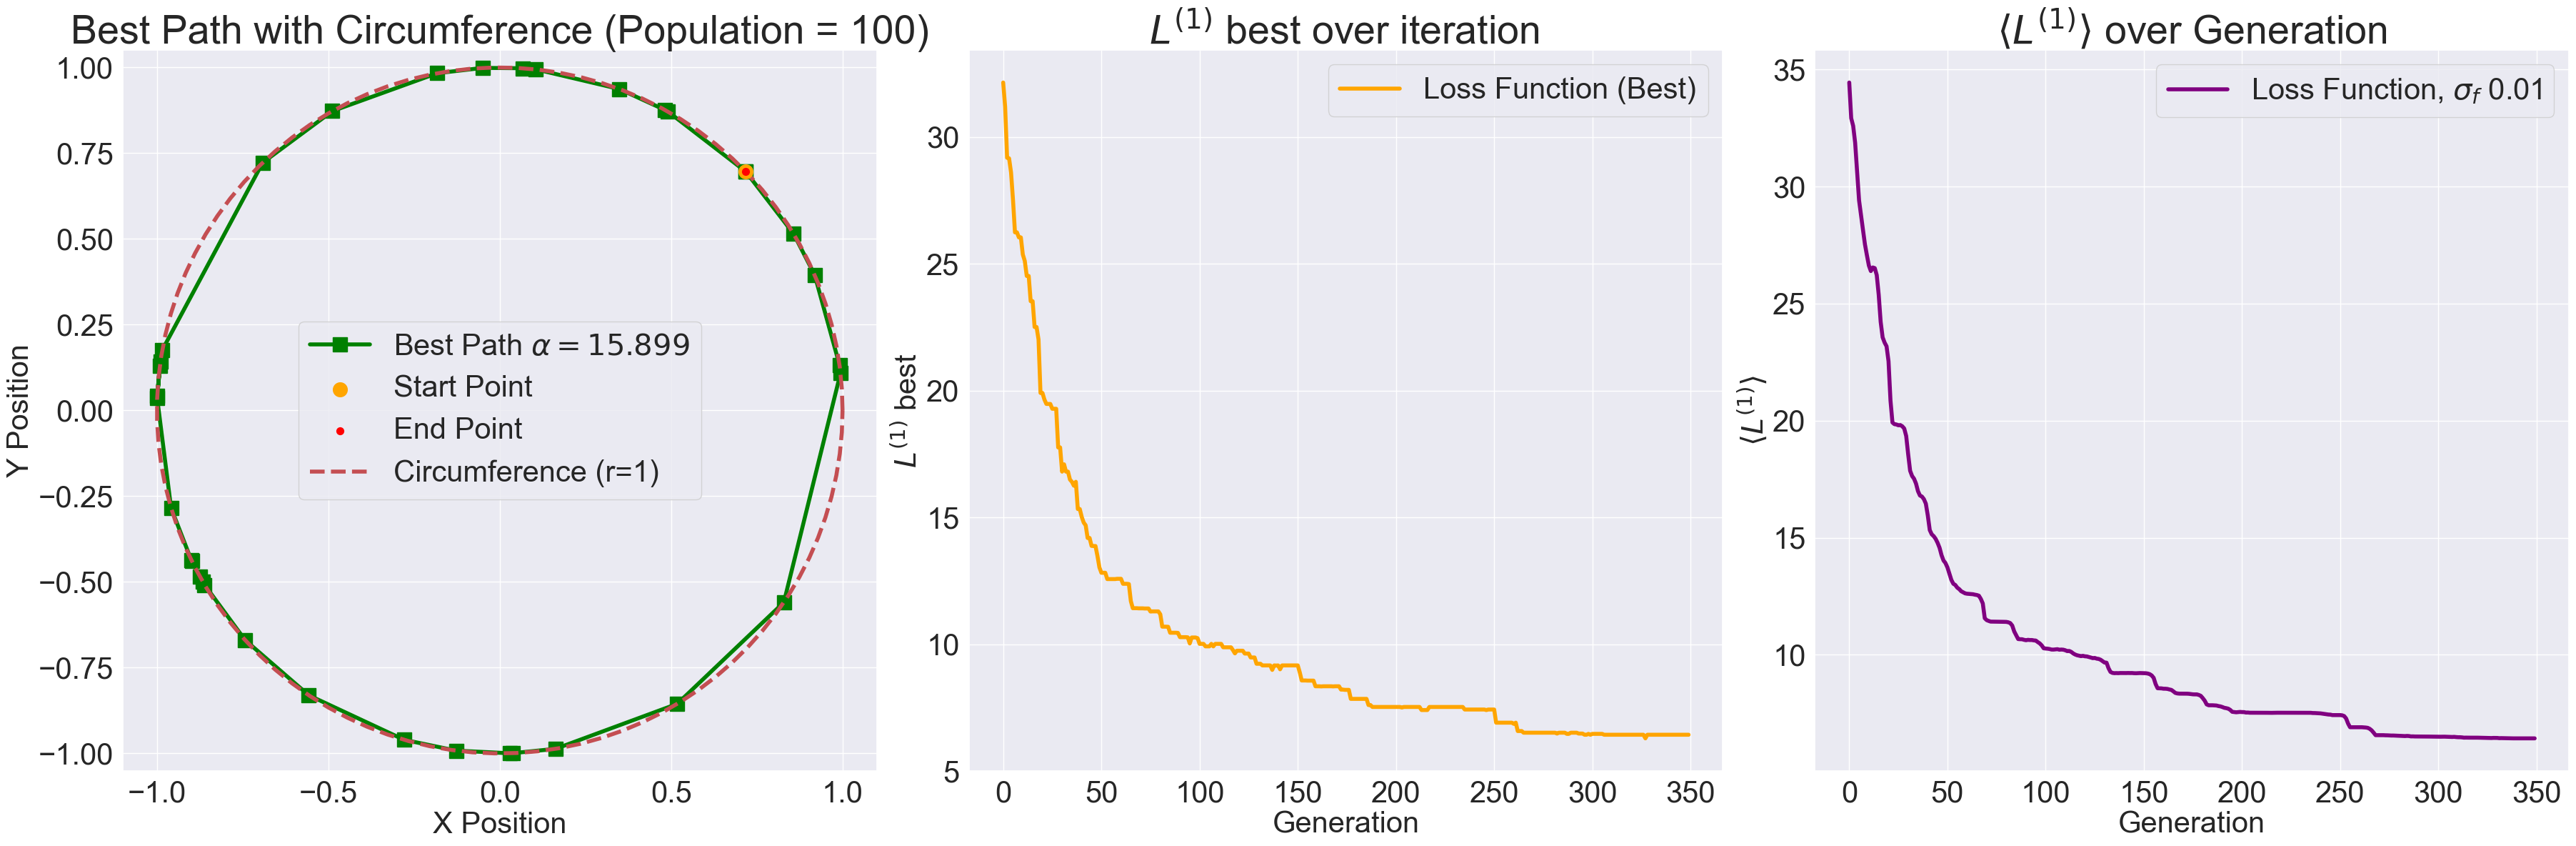

In [51]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set the visual theme for the plots
sns.set_theme(style='darkgrid')

# 1. Load the file with the path positions
file_path_path = './Esercizio_9_1/OUTPUT/best_path_circunference_b.dat'
data_path = np.loadtxt(file_path_path, skiprows=1)  # Assuming there are two columns (X, Y)
x_positions = data_path[:, 0]  # Extract x positions
y_positions = data_path[:, 1]  # Extract y positions

# 2. Load the loss function data for the second subplot
file_path_loss = './Esercizio_9_1/OUTPUT/Loss_media_circunference_best.dat'
data_loss = np.loadtxt(file_path_loss, skiprows=1)  # Load the data, skipping the header row

# Separate the columns: first column for plotting, last value of the second column for dev_std_best
loss_values = data_loss[:, 0]  # Take only the first column for plotting
dev_std_best = data_loss[-1, 1]  # Take the last value of the second column

# 3. Load the loss function data for the third subplot
file_path_loss_single = './Esercizio_9_1/OUTPUT/Loss_media_circunference_best_single.dat' 
loss_values_single = np.loadtxt(file_path_loss_single, skiprows=1)  # Load the loss values for the single case

# 4. Create a figure with three subplots (subplot 1 for the path, subplot 2 for the first loss function, subplot 3 for the second loss function)
fig, axs = plt.subplots(1, 3, figsize=(36, 12))  # Adjusted to accommodate 3 subplots

# 4.1. Plot the path with the circumference
axs[0].plot(x_positions, y_positions, marker='s',markersize = 15, linestyle='-', color='green', label=r'Best Path $\alpha = 15.899 $', lw=4)
axs[0].scatter(x_positions[0], y_positions[0], color='orange', s=200, zorder=5, label='Start Point')
axs[0].scatter(x_positions[-1], y_positions[-1], color='red', s=50, zorder=5, label='End Point')

# Draw the circumference of radius 1 (representing the boundary of the circle)
raggio = 1
theta = np.linspace(0, 2 * np.pi, 100)
x_circle = raggio * np.cos(theta)
y_circle = raggio * np.sin(theta)

axs[0].plot(x_circle, y_circle, color='r', linestyle='--', label='Circumference (r=1)', lw=4)
axs[0].set_title("Best Path with Circumference (Population = 100)", fontsize=40)
axs[0].set_xlabel("X Position", fontsize=30)
axs[0].set_ylabel("Y Position", fontsize=30)
axs[0].legend(fontsize=30)
axs[0].grid(True)
axs[0].axis('equal')
axs[0].tick_params(axis='both', labelsize=30)

# 4.2. Plot the average loss function (second subplot)
axs[2].plot(loss_values, color='purple', label=f'Loss Function, $\sigma_f$ {0.01}', lw=4)
axs[2].set_title(r"$\langle L^{(1)}\rangle$ over Generation", fontsize=40)
axs[2].set_xlabel("Generation", fontsize=30)
axs[2].set_ylabel(r"$\langle L^{(1)}\rangle$", fontsize=30)
axs[2].legend(fontsize=30)
axs[2].grid(True)
axs[2].tick_params(axis='both', labelsize=30)

# 4.3. Plot the best loss function (third subplot)
axs[1].plot(loss_values_single, color='orange', label='Loss Function (Best)', lw=4)
axs[1].set_title(r"$L^{(1)}$ best over iteration ", fontsize=40)
axs[1].set_xlabel("Generation", fontsize=30)
axs[1].set_ylabel(r"$L^{(1)}$ best", fontsize=30)
axs[1].legend(fontsize=30)
axs[1].grid(True)
axs[1].tick_params(axis='both', labelsize=30)

# 5. Display the figure with all three subplots
plt.tight_layout()
plt.show()




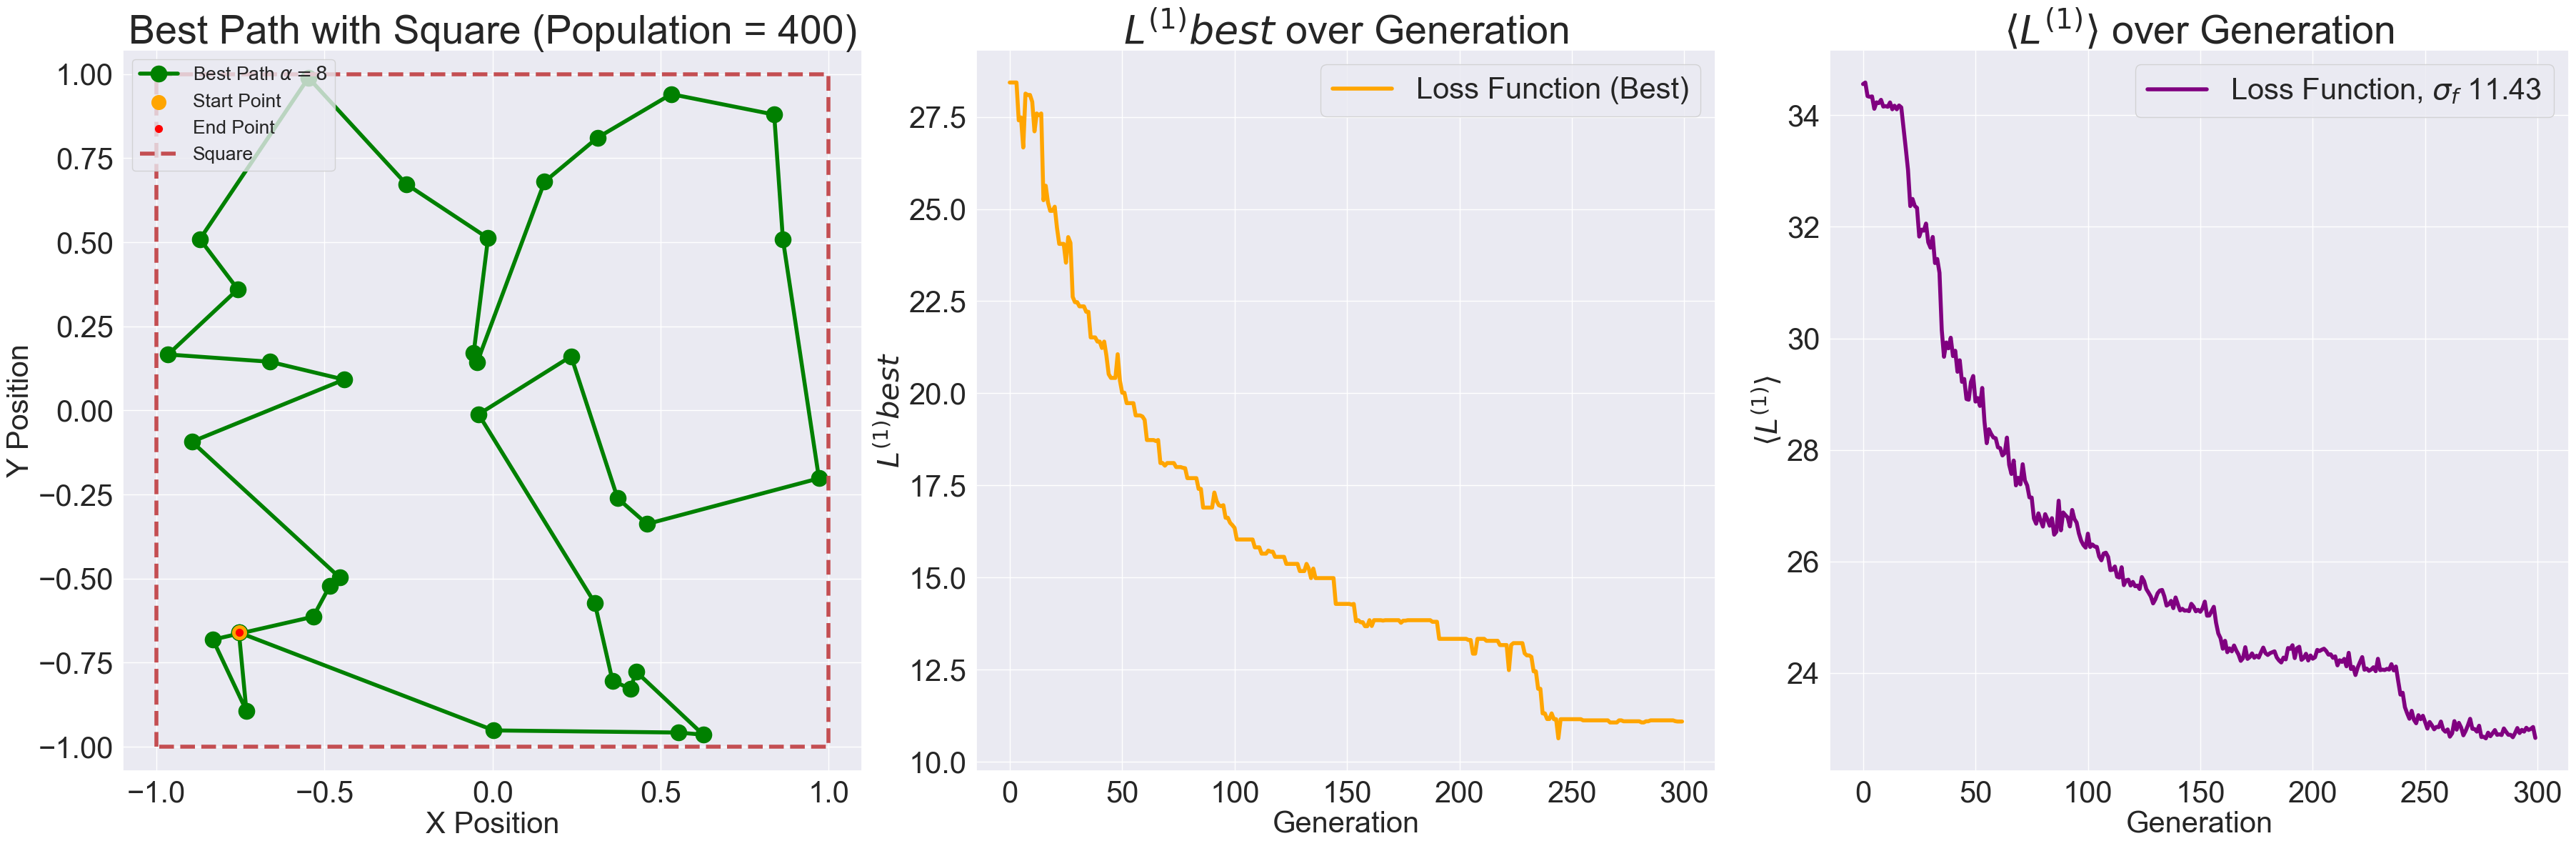

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set the visual theme for the plots
sns.set_theme(style='darkgrid')

# 1. Load the positions from the 'best_path_square.dat' file
file_path_positions = './Esercizio_9_1/OUTPUT/best_path_square_b.dat'
data_positions = np.loadtxt(file_path_positions, skiprows=1)  # Assuming two columns (X, Y)
x_positions = data_positions[:, 0]
y_positions = data_positions[:, 1]

# 2. Load the loss function values from the 'Loss_media_square_best.dat' file
file_path_loss = './Esercizio_9_1/OUTPUT/Loss_media_square_best.dat'
data_loss = np.loadtxt(file_path_loss, skiprows=1)  # Load the data, skipping the header row

# Separate the columns: first column for plotting, last value of the second column for dev_std_best
loss_values = data_loss[:, 0]  # Take only the first column for plotting
dev_std_best = data_loss[-1, 1]  # Take the last value of the second column

# 3. Load the loss function values from the 'Loss_media_square_best_single.dat' file
file_path_loss_single = './Esercizio_9_1/OUTPUT/Loss_media_square_best_single.dat'
loss_values_single = np.loadtxt(file_path_loss_single, skiprows=1)

# 4. Create a figure with three subplots: one for the path, one for the first loss function, and one for the second loss function
fig, axs = plt.subplots(1, 3, figsize=(36, 12))  # Adjusted for three subplots

# 4.1. Plot the best path in the first subplot
axs[0].plot(x_positions, y_positions, marker='o',markersize =16 ,linestyle='-', color='green', label=r'Best Path $\alpha = 8$', lw=4)
axs[0].scatter(x_positions[0], y_positions[0], color='orange', s=200, zorder=5 ,label='Start Point')
axs[0].scatter(x_positions[-1], y_positions[-1], color='red', s=50, zorder=5, label='End Point')

# 4.2. Draw a square centered at (0,0) with side length 1
side_length = 1
half_side = side_length  # Adjusted to ensure the square is centered
square_x = np.array([-half_side, -half_side, half_side, half_side, -half_side])
square_y = np.array([-half_side, half_side, half_side, -half_side, -half_side])
axs[0].plot(square_x, square_y, color='r', linestyle='--', label='Square', lw=4)

# Customize the first subplot
axs[0].set_title("Best Path with Square (Population = 400)", fontsize=40)
axs[0].set_xlabel("X Position", fontsize=30)
axs[0].set_ylabel("Y Position", fontsize=30)
axs[0].legend(loc=2, fontsize=19)
axs[0].grid(True)
axs[0].axis('equal')  # Maintain aspect ratio
axs[0].tick_params(axis='both', labelsize=30)

# 5. Plot the first loss function in the second subplot
axs[2].plot(loss_values, color='purple', label=f'Loss Function, $\sigma_f$ {np.round(dev_std_best,2)}', lw=4)
axs[2].set_title(r"$\langle L^{(1)} \rangle$ over Generation", fontsize=40)
axs[2].set_xlabel("Generation", fontsize=30)
axs[2].set_ylabel(r"$\langle L^{(1)} \rangle$", fontsize=30)
axs[2].legend(fontsize=30)
axs[2].grid(True)
axs[2].tick_params(axis='both', labelsize=30)

# 6. Plot the second loss function in the third subplot
axs[1].plot(loss_values_single, color='orange', label='Loss Function (Best)', lw=4)
axs[1].set_title("$L^{(1)} best$ over Generation", fontsize=40)
axs[1].set_xlabel("Generation", fontsize=30)
axs[1].set_ylabel("$L^{(1)} best$", fontsize=30)
axs[1].legend(fontsize=30)
axs[1].grid(True)
axs[1].tick_params(axis='both', labelsize=30)

# 7. Show the figure
plt.tight_layout()
plt.show()

# Print dev_std_best for verification



## Observations and discussion:
For both cases, it was possible to find convergence to a solution. The case of cities on the circumference is easily intuitive, as one expects a solution that follows the circumference. On the other hand, for the cities within the square, it is more difficult to identify a priori a simplified path. However, since the path does not intersect, it is assumed to be the most suitable one.

Looking at the Loss plots, the $L^1$ and $\langle L^1 \rangle$ for each shape don't always converge to the same result: 
- for the circumference $L^1 $ = 6.49 and $\langle L^1 \rangle $ = 6.49 $\pm$ 0.01;
- for the square $L^1 $ = 11.08 and $\langle L^1 \rangle $ = 22.83 $\pm$ 11. 43;

where the error for $\langle L^1 \rangle $ is the $\sigma_f$ put in the legende, calculating as the deviation standard of the mean.

This difference can be justified by the fact that the path for the cities inside the square was processed on a population consisting of 400 units. Therefore, when calculating the average value over half of the population, it is possible that this is influenced more significantly by the larger number of units.

Another aspect to notice is that for the plot of $L_{(1)}$ best, convergence occurs to a local minimum; however, as generations progress, there are downward peaks indicating better minima that are not preserved. Although it converges globally to the minimum, it seems the algorithm fails to retain the absolute minimum. In particular, examining the data in the file `./Esercizio_9_1/OUTPUT/Loss_media_square_best_single.dat` shows that the attained value leads to $L_{(1)} = 11.0923$, while the lowest value is actually $L_{(1)} = 11.065$. This better minimum is maintained for a few generations but is eventually replaced by the last reached value.

To explain this result, I hypothesized a flaw in the selection method. Although the algorithm does favor paths with the best loss values, because we are dealing with very low, closely spaced $L_{(1)}$ values (which are further favored by the high exponent in $\alpha$ ), both paths might have been selected. If they were later modified by mutations or crossover, it’s possible to return to a value close to, but not quite, the better minimum. So, while the algorithm works globally, there is this limitation that doesn’t fully guarantee convergence to the absolute minimum.

This issue is also more evident in processes with a large population , where the influence of the best individual might be diminished, where. Since each weight is normalized over the sum of all losses, the best individual’s influence could be reduced in the selection process.

In addition, what can be observed is that the genetic algorithm allows the loss function to decay quickly after the first generations, but only in the final generations does it reach clear convergence.

This last point led to several difficulties in finding convergence, especially in the search for the $\alpha$ parameter, as even a small change in the parameter while keeping the others constant caused a significant change in the final value of the loss function. Changing the values of the mutation and crossover probabilities also made the search more challenging, particularly where the population size was smaller. This was likely because there was a lower probability of generating a more optimal path.

Additionally, as mentioned below, the algorithm often got stuck in values that led to finding "local minima," causing the program to converge to suboptimal minimum values instead of the expected global optimum.




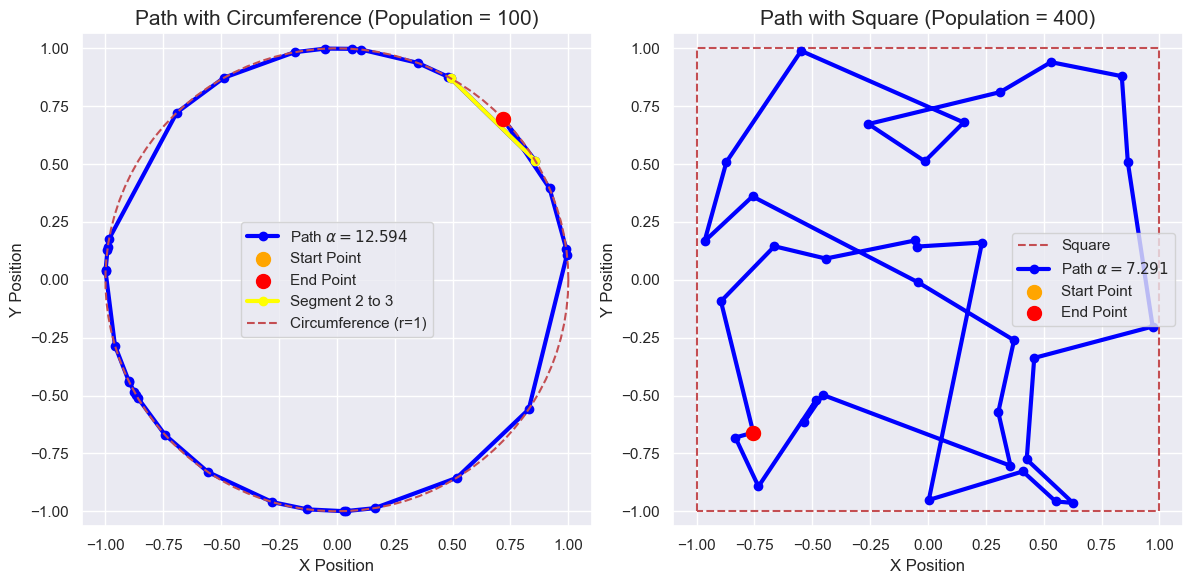

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set the theme for the plots
sns.set_theme(style='darkgrid')

# 1. Load the path data (positions of the path for the circumference)
file_path_path = './Esercizio_9_1/OUTPUT/best_path_circunference_w.dat'

# Skip the first row (header), load the data into x, y columns
data_path = np.loadtxt(file_path_path, skiprows=1)  # Assuming there are two columns (X, Y)
x_positions = data_path[:, 0]
y_positions = data_path[:, 1]

# 2. Load the loss function data for the second plot (path within the square)
file_path_loss = './Esercizio_9_1/OUTPUT/best_path_square_w.dat'
loss_values = np.loadtxt(file_path_loss, skiprows=1)

# 3. Create a figure with two subplots (subplot)
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# 3.1. Plot the path with the circumference
# Plot the entire path with the circumference
axs[0].plot(x_positions, y_positions, marker='o', linestyle='-', color='blue', label=r'Path $\alpha =12.594 $',lw=3)
axs[0].scatter(x_positions[0], y_positions[0], color='orange', s=100, zorder=5, label='Start Point')
axs[0].scatter(x_positions[-1], y_positions[-1], color='red', s=100, zorder=5, label='End Point')

# Highlight the segment connecting the second and third points in orange
axs[0].plot(x_positions[1:3], y_positions[1:3], marker='o', linestyle='-', color='yellow', label='Segment 2 to 3',lw=3)

# Draw the circumference (circle of radius 1)
raggio = 1  # Radius of the circumference
theta = np.linspace(0, 2 * np.pi, 100)  # Angle values from 0 to 2*pi
x_circle = raggio * np.cos(theta)  # X coordinates of the circle
y_circle = raggio * np.sin(theta)  # Y coordinates of the circle

axs[0].plot(x_circle, y_circle, color='r', linestyle='--', label='Circumference (r=1)')

# Customization of the first subplot
axs[0].set_title("Path with Circumference (Population = 100)", fontsize=15)
axs[0].set_xlabel("X Position", fontsize=12)
axs[0].set_ylabel("Y Position", fontsize=12)
axs[0].legend(loc=0)  # Legend at the best location
axs[0].grid(True)
axs[0].axis('equal')  # To maintain equal scaling between the axes

# 3.2. Plot the path with the square
side_length = 1  # Side length of the square
half_side = side_length  # Half side length (centered around the origin)

# Coordinates for the square corners
square_x = np.array([-half_side, -half_side, half_side, half_side, -half_side])
square_y = np.array([-half_side, half_side, half_side, -half_side, -half_side])  # Y coordinates

# Plot the square (dashed red line)
axs[1].plot(square_x, square_y, color='r', linestyle='--', label='Square')

# Load the path data for the square from 'loss_values' with two columns (X, Y)
x_positions_square = loss_values[:, 0]  # X positions for square
y_positions_square = loss_values[:, 1]  # Y positions for square

# Plot the path for the square
axs[1].plot(x_positions_square, y_positions_square, marker='o', linestyle='-', color='blue', label=r'Path $\alpha = 7.291 $',lw=3)
axs[1].scatter(x_positions_square[0], y_positions_square[0], color='orange', s=100, zorder=5, label='Start Point')
axs[1].scatter(x_positions_square[-1], y_positions_square[-1], color='red', s=100, zorder=5, label='End Point')

# Customization of the second subplot
axs[1].set_title("Path with Square (Population = 400)", fontsize=15)
axs[1].set_xlabel("X Position", fontsize=12)
axs[1].set_ylabel("Y Position", fontsize=12)
axs[1].legend(loc=0)  # Legend at the best location
axs[1].grid(True)
axs[1].axis('equal')  # To maintain equal scaling between the axes

# 4. Show the figure with both subplots
plt.tight_layout()  # Adjust layout to avoid overlapping
plt.show()  # Display the plots


In these graphs, convergence can be observed, although it is not optimal, as there are sections that overlap with each other. Specifically, in the circumference, I have highlighted in yellow the segment that prevents optimal convergence, while in the square, the crossings are evident.